In [9]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from pylab import rcParams

import seaborn as sb

# Import Data

In [10]:
address1 = '/Users/foppong/Desktop/Data Analyses/partynyc/bar_locations.csv'
address2 = '/Users/foppong/Desktop/Data Analyses/partynyc/party_in_nyc.csv'


bar_locations = pd.read_csv(address1)
incident_locations = pd.read_csv(address2)

# Data Munging

In [11]:
# head() returns only the frist 5 rows of your dataset, other commands include tail() and sample(5)
bar_locations.head()

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls
0,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544096,-74.141155,40
1,Club/Bar/Restaurant,10012.0,NEW YORK,MANHATTAN,40.729793,-73.998842,18
2,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544209,-74.141040,21
3,Club/Bar/Restaurant,10034.0,NEW YORK,MANHATTAN,40.866376,-73.928258,160
4,Club/Bar/Restaurant,11220.0,BROOKLYN,BROOKLYN,40.635207,-74.020285,17


In [12]:
incident_locations.head()

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516


In [13]:
# Comparing with scalars. Number of calls column is most applicable here
bar_locations.sample(10) > 10

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls
2205,True,True,True,True,True,False,True
1053,True,True,True,True,True,False,True
1084,True,True,True,True,True,False,True
1895,True,True,True,True,True,False,True
874,True,True,True,True,True,False,True
614,True,True,True,True,True,False,True
908,True,True,True,True,True,False,True
1488,True,True,True,True,True,False,False
1136,True,True,True,True,True,False,True
1746,True,True,True,True,True,False,True


In [18]:
# Figuring out what data is missing
bar_locations.isnull()

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [19]:
# Filtering out missing values
bar_locations_no_NaN = bar_locations.dropna()
bar_locations_no_NaN

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls
0,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544096,-74.141155,40
1,Club/Bar/Restaurant,10012.0,NEW YORK,MANHATTAN,40.729793,-73.998842,18
2,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544209,-74.141040,21
3,Club/Bar/Restaurant,10034.0,NEW YORK,MANHATTAN,40.866376,-73.928258,160
4,Club/Bar/Restaurant,11220.0,BROOKLYN,BROOKLYN,40.635207,-74.020285,17
5,Club/Bar/Restaurant,10029.0,NEW YORK,MANHATTAN,40.791861,-73.945392,211
6,Club/Bar/Restaurant,10002.0,NEW YORK,MANHATTAN,40.718795,-73.989012,41
7,Club/Bar/Restaurant,10034.0,NEW YORK,MANHATTAN,40.869549,-73.916348,271
8,Club/Bar/Restaurant,11373.0,ELMHURST,QUEENS,40.739249,-73.884457,15
9,Club/Bar/Restaurant,10013.0,NEW YORK,MANHATTAN,40.722789,-74.004596,43


In [20]:
incident_locations_no_NAN = incident_locations.dropna()
incident_locations_no_NAN

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516
5,2015-12-31 00:08:05,2015-12-31 01:59:12,Residential Building/House,10467.0,BRONX,BRONX,40.858748,-73.865625
6,2015-12-31 00:11:40,2015-12-31 06:24:00,Residential Building/House,11230.0,BROOKLYN,BROOKLYN,40.617005,-73.956920
7,2015-12-31 00:12:13,2015-12-31 00:38:09,Residential Building/House,11215.0,BROOKLYN,BROOKLYN,40.665051,-73.981278
8,2015-12-31 00:12:37,2015-12-31 05:03:39,Residential Building/House,10463.0,BRONX,BRONX,40.875895,-73.912471
9,2015-12-31 00:14:13,2015-12-31 06:25:40,Store/Commercial,11372.0,JACKSON HEIGHTS,QUEENS,40.755584,-73.885201


In [21]:
# Remove duplicates
bar_locations_clean = bar_locations_no_NaN.drop_duplicates()
bar_locations_clean

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls
0,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544096,-74.141155,40
1,Club/Bar/Restaurant,10012.0,NEW YORK,MANHATTAN,40.729793,-73.998842,18
2,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544209,-74.141040,21
3,Club/Bar/Restaurant,10034.0,NEW YORK,MANHATTAN,40.866376,-73.928258,160
4,Club/Bar/Restaurant,11220.0,BROOKLYN,BROOKLYN,40.635207,-74.020285,17
5,Club/Bar/Restaurant,10029.0,NEW YORK,MANHATTAN,40.791861,-73.945392,211
6,Club/Bar/Restaurant,10002.0,NEW YORK,MANHATTAN,40.718795,-73.989012,41
7,Club/Bar/Restaurant,10034.0,NEW YORK,MANHATTAN,40.869549,-73.916348,271
8,Club/Bar/Restaurant,11373.0,ELMHURST,QUEENS,40.739249,-73.884457,15
9,Club/Bar/Restaurant,10013.0,NEW YORK,MANHATTAN,40.722789,-74.004596,43


In [22]:
incidents_clean = incident_locations_no_NAN.drop_duplicates()
incidents_clean

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516
5,2015-12-31 00:08:05,2015-12-31 01:59:12,Residential Building/House,10467.0,BRONX,BRONX,40.858748,-73.865625
6,2015-12-31 00:11:40,2015-12-31 06:24:00,Residential Building/House,11230.0,BROOKLYN,BROOKLYN,40.617005,-73.956920
7,2015-12-31 00:12:13,2015-12-31 00:38:09,Residential Building/House,11215.0,BROOKLYN,BROOKLYN,40.665051,-73.981278
8,2015-12-31 00:12:37,2015-12-31 05:03:39,Residential Building/House,10463.0,BRONX,BRONX,40.875895,-73.912471
9,2015-12-31 00:14:13,2015-12-31 06:25:40,Store/Commercial,11372.0,JACKSON HEIGHTS,QUEENS,40.755584,-73.885201


In [23]:
# Sorting data
bar_locations_clean_sorted = bar_locations_clean.sort_values(by="num_calls", ascending=[False])
bar_locations_clean_sorted

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls
162,Club/Bar/Restaurant,11217.0,BROOKLYN,BROOKLYN,40.679154,-73.983430,1513
13,Club/Bar/Restaurant,10009.0,NEW YORK,MANHATTAN,40.723494,-73.988253,1175
590,Club/Bar/Restaurant,10032.0,NEW YORK,MANHATTAN,40.842708,-73.936752,728
213,Club/Bar/Restaurant,11226.0,BROOKLYN,BROOKLYN,40.640182,-73.955306,642
916,Club/Bar/Restaurant,11206.0,BROOKLYN,BROOKLYN,40.703934,-73.947552,464
16,Club/Bar/Restaurant,10040.0,NEW YORK,MANHATTAN,40.864377,-73.926536,458
143,Club/Bar/Restaurant,11414.0,HOWARD BEACH,QUEENS,40.649982,-73.837586,399
513,Club/Bar/Restaurant,11415.0,KEW GARDENS,QUEENS,40.709637,-73.830025,393
187,Club/Bar/Restaurant,11433.0,JAMAICA,QUEENS,40.707531,-73.786600,388
478,Club/Bar/Restaurant,11372.0,JACKSON HEIGHTS,QUEENS,40.746429,-73.895347,355


# Data Visualization

## Histograms

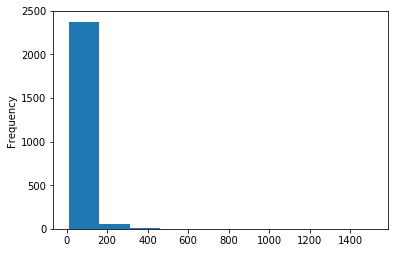

In [45]:
bar_locations = bar_locations_clean_sorted
bar_locations.columns = ['Location_Type', 'Incident_Zip', 'City', 'Borough', 'Latitude', 'Longitude', 'num_calls']
bar_locations.index = bar_locations.Location_Type
num_calls = bar_locations['num_calls']

#Have to be numerical values in the column (at least with this function)
num_calls.plot(kind='hist')

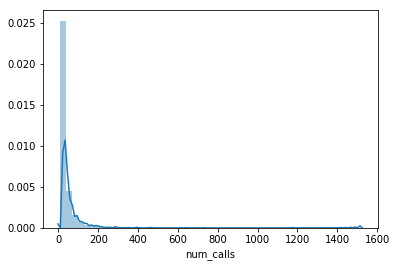

In [44]:
sb.distplot(num_calls)

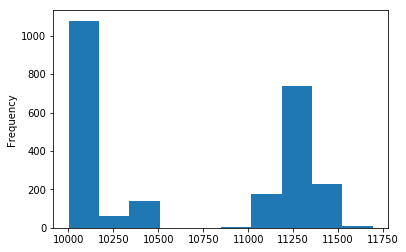

In [41]:
incident_zip = bar_locations['Incident_Zip']
incident_zip.plot(kind='hist')

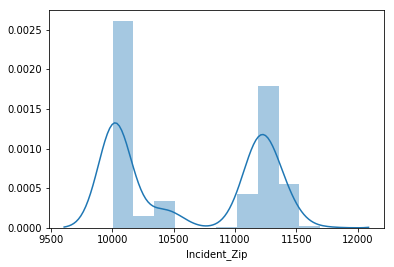

In [43]:
sb.distplot(incident_zip)

## Scatterplots

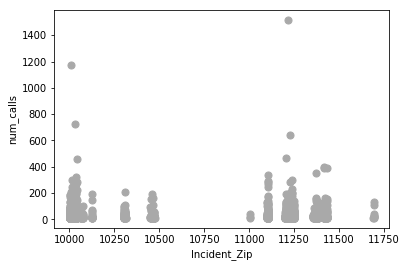

In [48]:
# s = size of the dots
bar_locations.plot(kind='scatter', x='Incident_Zip', y='num_calls', c=['darkgray'], s=50)

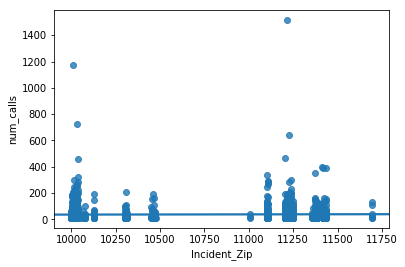

In [49]:
sb.regplot(x='Incident_Zip', y='num_calls', data=bar_locations, scatter=True)

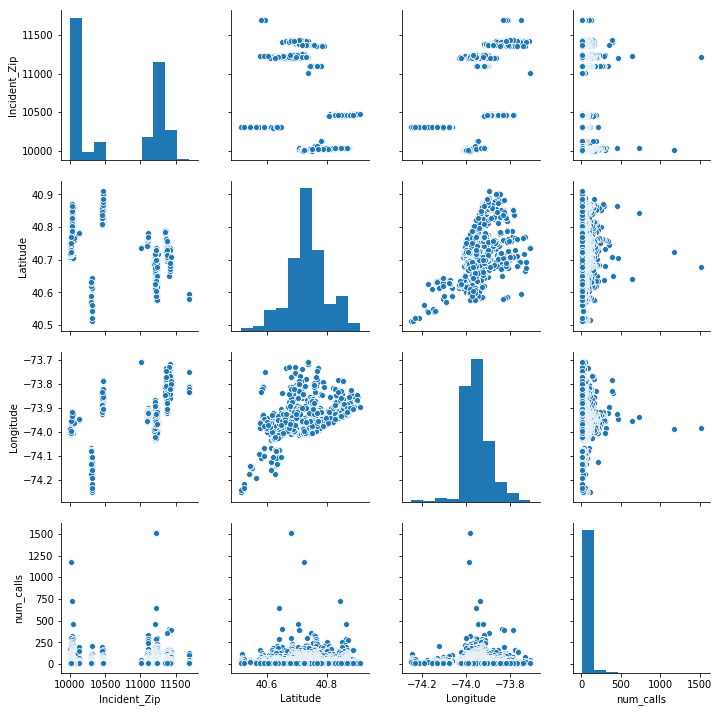

In [50]:
sb.pairplot(bar_locations)